## Análise exploratória de dados (Python)
Como analista da Zuber, meu objetivo é identificar padrões vitais nos dados disponíveis. Neste cenário, compreender as preferências dos passageiros e os impactos de variáveis externas nas corridas é crucial para aprimorar os serviços oferecidos e garantir uma experiência de viagem excepcional. Este projeto se concentra em examinar informações obtidas e testar hipóteses relevantes para a Zuber. Aplicar técnicas de análise de dados em Python, Faremos a renomeação dos dados para uma análise eficiente. Além disso, testaremos hipóteses sobre o impacto do clima nas viagens, empregando métodos estatísticos e visualizações para validar ou refutar essas suposições. A estratégia e oferecer um serviço diferenciado e adaptado às necessidades dos passageiros em Chicago

## Inicialização

In [1]:
# Importando biblioteca 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Caminho do arquivo CSV
result_01 = "/datasets/project_sql_result_01.csv"

# Importar o arquivo CSV para DataFrames
trips_amount = pd.read_csv(result_01)
trips_amount.info()
trips_amount.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [3]:
# Renomeando as colunas
trips_amount = trips_amount.rename(columns={"company_name": "empresa", "trips_amount": "número_de_corridas"})
trips_amount.head()

,empresa,número_de_corridas
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Caminhos dos arquivos CSV
result_04 = "/datasets/project_sql_result_04.csv"

# Importar os arquivos CSV para DataFrames
average_trips = pd.read_csv(result_04)
average_trips.info()
average_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
# Renomear as colunas
average_trips = average_trips.rename(columns={"dropoff_location_name": "destino_final", "average_trips": "Media_de_viagens"})
average_trips.head()

,destino_final,Media_de_viagens
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Identificar os 10 principais bairros em termos de destinos
# Agrupar por destino_final e somar as viagens para cada destino
destinos_count = average_trips.groupby('destino_final')['Media_de_viagens'].sum().reset_index()

# 10 principais destinos
top_10_destinos = destinos_count.sort_values(by='Media_de_viagens', ascending=False).head(10)
top_10_destinos.head(10)

,destino_final,Media_de_viagens
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


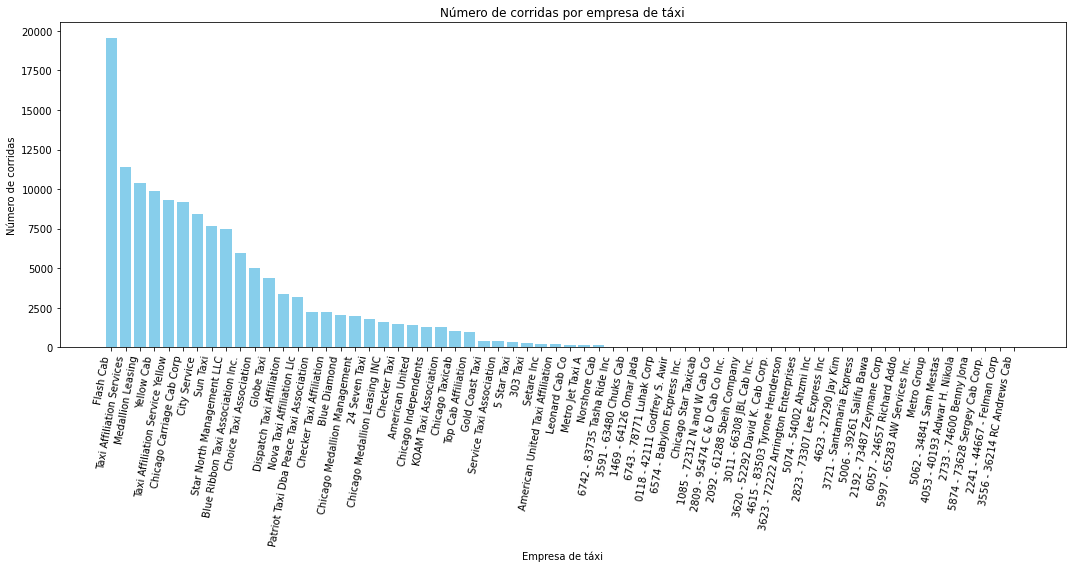

In [7]:
# Criar um gráfico de barras mostrando o número de corridas por empresa de táxi
plt.figure(figsize=(15, 8))  
plt.bar(trips_amount['empresa'], trips_amount['número_de_corridas'], color='skyblue') 
plt.title('Número de corridas por empresa de táxi')
plt.xlabel('Empresa de táxi')
plt.ylabel('Número de corridas')
plt.xticks(rotation=80, ha='right')
plt.tight_layout() 
plt.show()

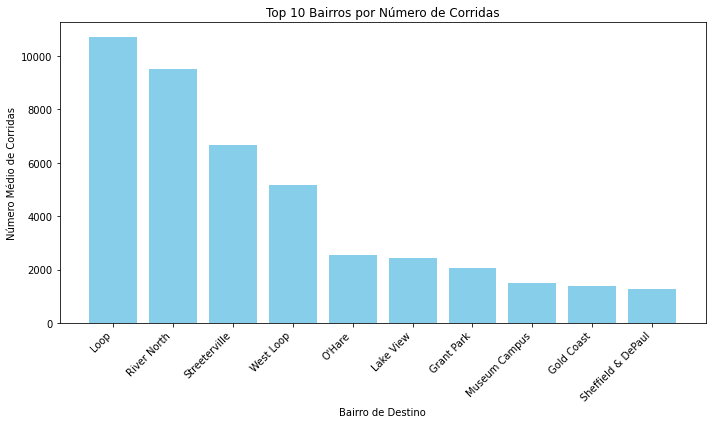

In [8]:
# Criar um gráfico de barras para os top 10 bairros por número de corridas
plt.figure(figsize=(10, 6))
plt.bar(top_10_destinos['destino_final'], top_10_destinos['Media_de_viagens'], color='skyblue')
plt.title('Top 10 Bairros por Número de Corridas')
plt.xlabel('Bairro de Destino')
plt.ylabel('Número Médio de Corridas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1 Gráfico de Número de Corridas por Empresa de Táxi:

O gráfico mostra claramente a variação entre as empresas de táxi, sendo assim uma ferramenta visual útil para entender a distribuição do volume de corridas entre diferentes empresas. As barras mais altas indicam mais corridas por empresa, permitindo identificar quais empresas são mais ativas ou populares entre os usuários. Permitindo assim um destaque de empresas principais e comparação entre empresas

2 Gráfico de Top 10 Bairros por Número de Corridas:

O gráfico destaca os top 10 bairros de destino com base no número médio de corridas. Os bairros representados pelas barras mais altas têm um número médio de corridas mais elevado, indicando uma maior demanda por serviços de táxi nesses locais, talvez por serem áreas específicas, como centros comerciais, residenciais ou turísticos, que se destacam como destinos principais.

## Testando hipóteses (Python)

In [9]:
# Carregar os dados do CSV
file_path = '/datasets/project_sql_result_07.csv'
data = pd.read_csv(file_path)

# Extrair o dia da semana (0 = segunda-feira, 1 = terça-feira, ..., 5 = sábado, 6 = domingo)
data['day_of_week'] = pd.to_datetime(data['start_ts']).dt.dayofweek

# Filtrar para os sábados (onde day_of_week == 5)
saturdays_data = data[data['day_of_week'] == 5]

# Filtrar os sábados chuvosos e atribuir à variável 'data'
saturdays_rainy = saturdays_data[saturdays_data['weather_conditions'] == 'chuvoso']
data

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [10]:
# Carregar os dados do CSV
file_path = '/datasets/project_sql_result_07.csv'
data = pd.read_csv(file_path)

# Filtrar para os sábados
data['start_ts'] = pd.to_datetime(data['start_ts'])
saturdays_data = data[data['start_ts'].dt.dayofweek == 5]  # 5 representa sábado

# Separar os dados para sábados chuvosos e sem chuva
saturdays_rainy = saturdays_data[saturdays_data['weather_conditions'] == 'Bad']
saturdays_non_rainy = saturdays_data[saturdays_data['weather_conditions'] == 'Good']


# Realize o teste t independente para comparar as médias de duração
# 'duration_seconds' é a coluna que contém as durações de viagem para os dois grupos
t_stat, p_value = ttest_ind(saturdays_rainy['duration_seconds'], saturdays_non_rainy['duration_seconds'], equal_var=False)

# Nível de significância (alfa)
alpha = 0.05

# Verificar se o valor-p é menor que o nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula")
    print("Há evidências de que a duração média dos passeios nos sábados chuvosos difere dos sábados sem chuva.")
else:
    print("Não temos evidências para rejeitar a hipótese nula")
    print("Não há diferença significativa na duração média dos passeios nos sábados chuvosos em relação aos sábados sem chuva.")

Rejeitamos a hipótese nula
Há evidências de que a duração média dos passeios nos sábados chuvosos difere dos sábados sem chuva.


In [11]:
p_value

6.738994326108734e-12

# Conclusão 

#### Formulação das hipóteses nula e alternativa:
Hipótese nula: Assume que não há diferença significativa entre a duração média das viagens nos sábados chuvosos e nos sábados sem chuva.

Hipótese alternativa: Por outro lado, afirma que há uma diferença significativa na duração média das viagens entre esses dois grupos de sábados.


#### O critério: 
O critério utilizado para testar a hipótese é o valor-p (p-value) resultante do teste t independente realizado com a função ttest_ind do scipy.stats. Nesse caso, um valor-p menor que o nível de significância escolhido (alfa, geralmente 0.05) leva à rejeição da hipótese nula.

O valor-p é menor que o nível de significância, a interpretação usual é que existem evidências estatísticas suficientes para rejeitar a hipótese nula, o que sugere que as médias das durações das viagens nos sábados chuvosos e nos sábados não chuvosos são diferentes de forma estatisticamente significativa.